#### (1)-

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_excel("flight_price.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [99]:
df.shape

(10683, 11)

##### The flight price dataset has 10683 rows and 11 columns.

#### (2)-
##### We check the distribution of Price column using a histogram

In [100]:
df["Price"].isnull().sum()

0

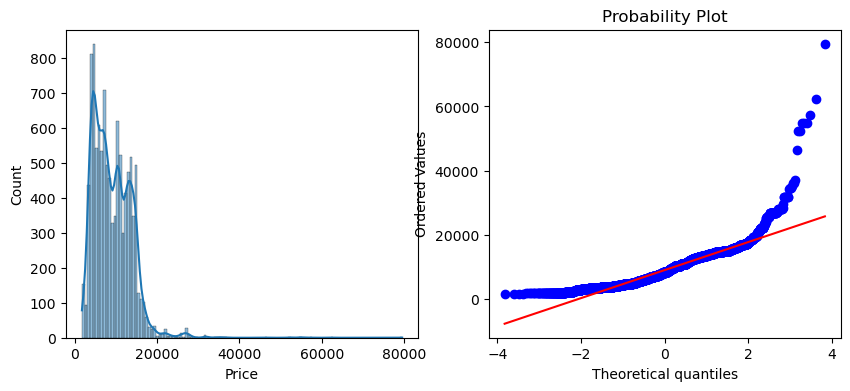

In [101]:
import scipy.stats as stat
import pylab

plt.figure(figsize=(10,4))
plt.subplot(121)
sns.histplot(x=df["Price"], data=df, kde=True)
plt.subplot(122)
stat.probplot(x=df["Price"], dist="norm", plot=pylab)
plt.show()

##### So, the distribution of Price column resembles normal distribution for a particular region as shown in QQ plot. But apart from that it doesn't follow normal distribution. It looks right skewed too.

#### (3)-

In [102]:
df["Price"].min()

1759

In [103]:
df["Price"].max()

79512

##### So, the range of Price is - (1759, 79512)

In [104]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


#### (4)-

In [105]:
df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

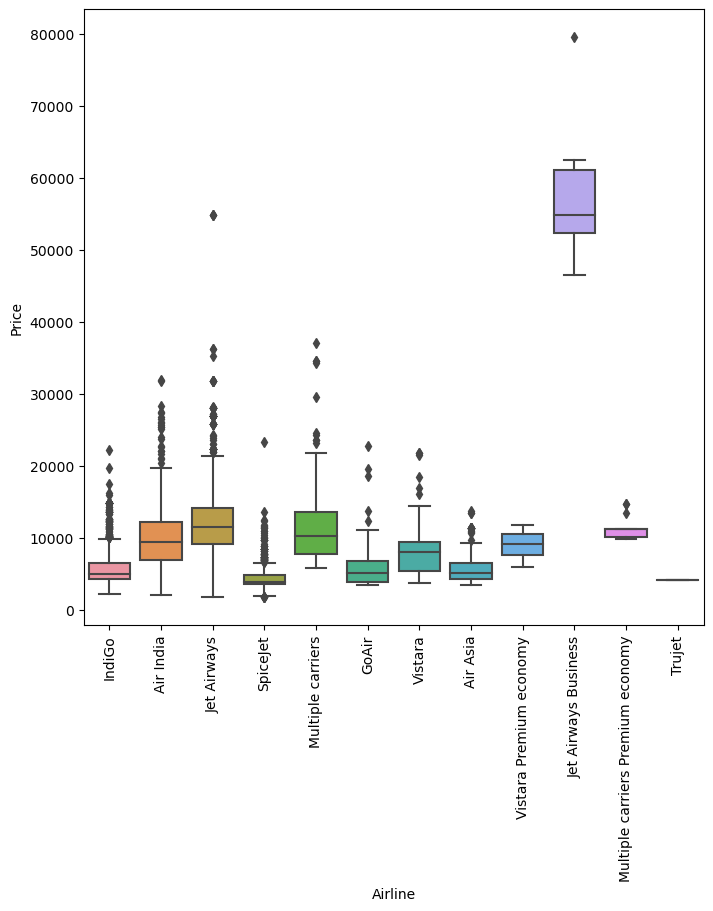

In [109]:
plt.figure(figsize=(8,8))
sns.boxplot(x= df["Airline"], y= df["Price"], data=df)
plt.xticks(rotation=90)
plt.show()

#### (5)-
##### Yes there are many outliers in the dataset. We find the outliers of the Price column which is the only numerical fetaure in our dataset at present.

In [110]:
min, Q1, median, Q3, max= np.quantile(df["Price"], [0.0, 0.25, 0.50, 0.75, 1.0])

In [111]:
min, Q1, median, Q3, max

(1759.0, 5277.0, 8372.0, 12373.0, 79512.0)

In [112]:
IQR= Q3-Q1
IQR

7096.0

In [113]:
lower_fence= Q1-IQR
lower_fence

-1819.0

In [114]:
upper_fence= Q3+IQR
upper_fence

19469.0

<AxesSubplot: >

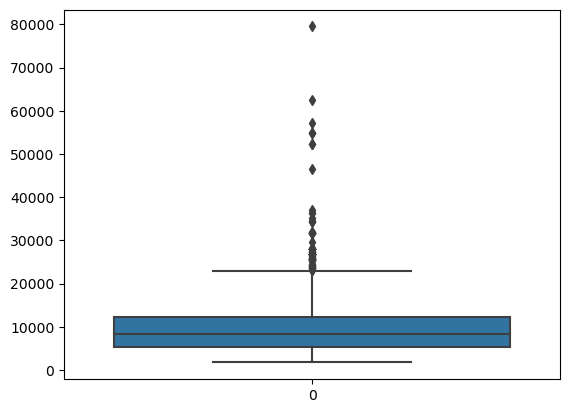

In [115]:
# all the values lying oitside this range [-1819.0, 19469.0] are considered as outliers. 
# we can view them using boxplots-

sns.boxplot(df["Price"])

- Outliers increase the variability in our data, which decreases statistical power.
- It causes a significant impact on the mean and the standard deviation of the data.

#### (6)-

In [116]:
# Feature Engineering on Duration column-
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [117]:
df["Duration_hour"]= df["Duration"].str.split(" ").str[0].str.split("h").str[0]
df["Duration_min"]= df["Duration"].str.split(" ").str[1].str.split("m").str[0]
df["Duration_min"].fillna(0, inplace=True)

In [118]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_hour,Duration_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,19,0


In [119]:
df["Duration_hour"]= df["Duration_hour"].astype(int)
df["Duration_min"]= df["Duration_min"].astype(int)

ValueError: invalid literal for int() with base 10: '5m'

In [120]:
df["Duration_hour"].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [121]:
df[df["Duration_hour"]=="5m"]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_hour,Duration_min
6474,Air India,6/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2 stops,No info,17327,5m,0


In [122]:
df= df.drop(6474).reset_index(drop=True)
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_hour,Duration_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,19,0


In [123]:
# typecasting Duration_hour and Duration_min columns to int type-
df["Duration_hour"]= df["Duration_hour"].astype(int)
df["Duration_min"]= df["Duration_min"].astype(int)

In [124]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Duration_hour       int64
Duration_min        int64
dtype: object

In [125]:
df["Total_duration"]= df["Duration_hour"]+(df["Duration_min"]/60)

In [126]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_hour,Duration_min,Total_duration
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2,50,2.833333
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,7,25,7.416667
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,19,0,19.000000


In [127]:
df1= pd.DataFrame(df.groupby("Date_of_Journey")["Total_duration"].sum().sort_values(ascending=False).reset_index()[:10])
df1

,Date_of_Journey,Total_duration
0,18/05/2019,6362.833333
1,9/06/2019,6200.583333
2,21/05/2019,6160.000000
3,6/06/2019,6069.250000
4,9/05/2019,6052.333333
5,12/06/2019,6011.333333
6,21/03/2019,5316.500000
7,15/05/2019,4494.083333
8,6/03/2019,4109.500000
9,27/05/2019,4086.833333


- We analyzed the Duration feature and Date_of_Journey feature to identify the peak travel season.
- From the above dataframe, we can see the top 10 durations and their corresponding dates. 
- So, the peak travel season is in the months of March, May, June.

#### (7)-
##### We can analyze the features like Airline, Total_stops, Total_duration, Additional_Info to see the trends in flight Price.
##### We can construct barplots to view these trends.
##### We can also create boxplot of Price column to see the outliers.

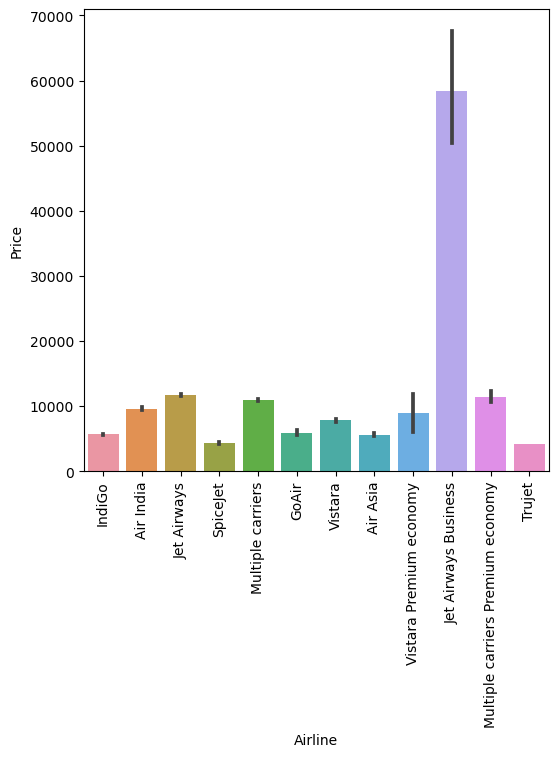

In [128]:
plt.figure(figsize=(6,6))
sns.barplot(x= df["Airline"], y=df["Price"], data=df)
plt.xticks(rotation=90)
plt.show()

##### Insights-
- Price is highest for Jet Airways Business airline.
- IndiGo, SpiceJet, GoAir, Air Asia, Trujet airlines has comparatively low prices

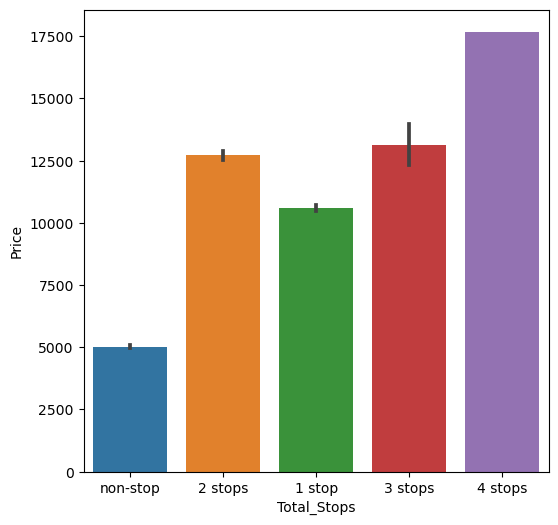

In [129]:
plt.figure(figsize=(6,6))
sns.barplot(x= df["Total_Stops"], y=df["Price"], data=df)
plt.show()

##### Insights-
- Greater the no. of stops higher is the Price.
- Price is low for non-stop i.e. 0 stops flight.
- Price is highest for 4 stops flight.

#### (8)-
##### The factors that affect the flight prices are obtained by analyzing the features such as-
- Airline
- Total_Stops
- Additional_Info
- Total_duration
- Source
- Destination

##### We have already drawn insights for Airline and Total_Stops feature and how they affect the flight Price. Now let's check out for other features by plotting barplots-

In [138]:
df["Additional_Info"].unique()

array(['No info', 'in-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [137]:
df["Additional_Info"]= df["Additional_Info"].str.replace("I", "i")

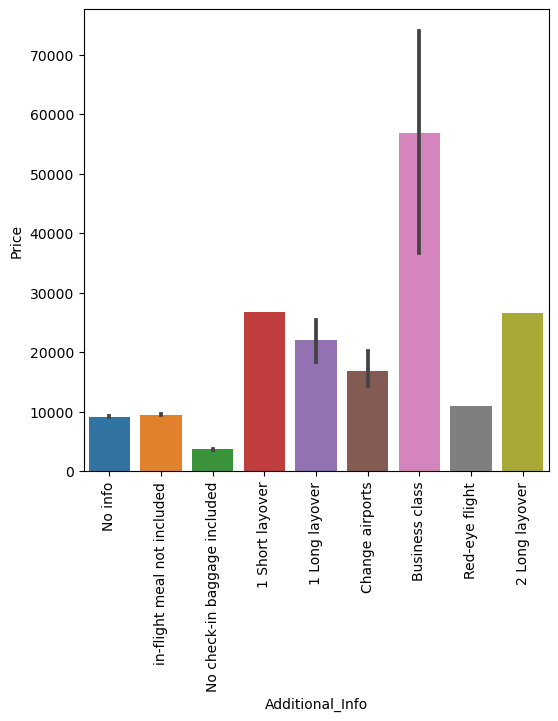

In [139]:
plt.figure(figsize=(6,6))
sns.barplot(x= df["Additional_Info"], y=df["Price"], data=df)
plt.xticks(rotation=90)
plt.show()

##### Insights-
- The Price of flights is highest for Business class
- The Price is also high when there are layovers.

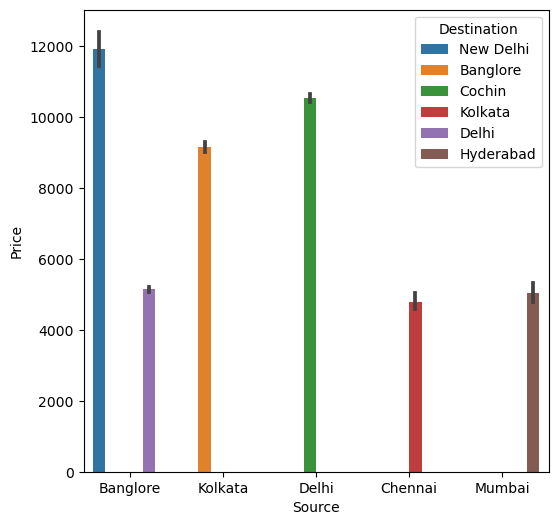

In [151]:
plt.figure(figsize=(6,6))
sns.barplot(x= df["Source"], y=df["Price"], hue="Destination", data=df)
plt.show()

##### Insights-
- The flights from Banglore to Delhi or New Delhi are the costliest.
- It is followed by the flights from Delhi to Cochin.
- Comparatively the flights from Chennai to Kolkata are cheap.

#### (9)-

In [24]:
df2= pd.read_csv("https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv")
df2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [26]:
df2.shape

(10841, 13)

##### So, the google playstore dataset has 10841 rows and 13 columns.

#### (10)-

In [27]:
df2["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [28]:
df2[df2["Category"]=="1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [29]:
# dropping this record-
df2= df2.drop(10472).reset_index(drop=True)

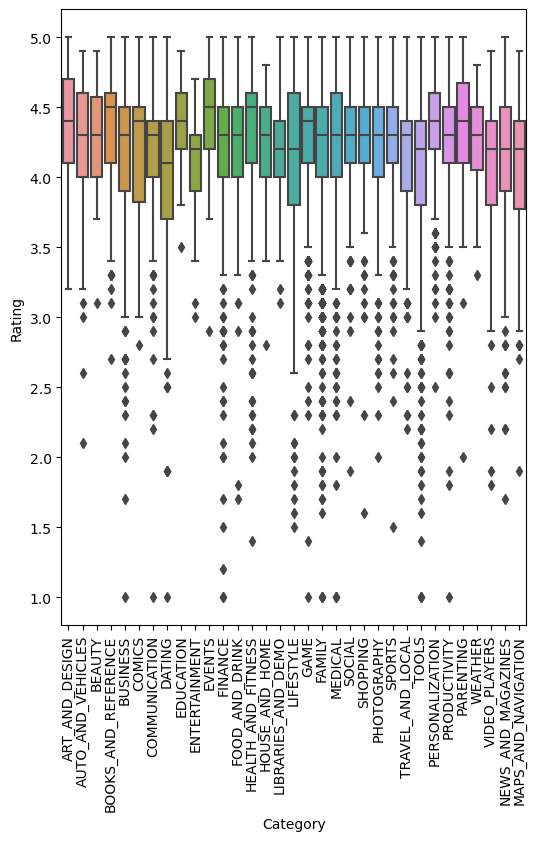

In [30]:
plt.figure(figsize=(6,8))
sns.boxplot(x= df2["Category"], y= df2["Rating"], data=df2)
plt.xticks(rotation=90)
plt.show()

#### (11)-

In [31]:
df2.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

##### So, the dataset has missing values-
- Rating has 1474 missing values
- Type has 1 missing value
- Current Ver has 8 missing value
- Android Ver has 2 missing value

In [32]:
df2[df2["Rating"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10823,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10824,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10830,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10834,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [33]:
df2[df2["Type"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


##### Missing values present in the dataset can impact the performance of the model by creating a bias in the dataset. This bias can create a lack of relatability and trustworthiness in the dataset. The loss in values might contain crucial insights or information for model development. 

#### (12)-

In [34]:
df2.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [35]:
# cleaning the Size column-
df2["Size"].isnull().sum()

0

In [36]:
df2["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [41]:
df2["Size"]= df2["Size"].replace("M", "000")
df2["Size"]= df2["Size"].str.replace("k", "")
df2["Size"]= df2["Size"].replace("Varies with device", np.nan)

In [42]:
df2["Size"]= df2["Size"].astype(float)

In [43]:
df2.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


<AxesSubplot: xlabel='Size', ylabel='Rating'>

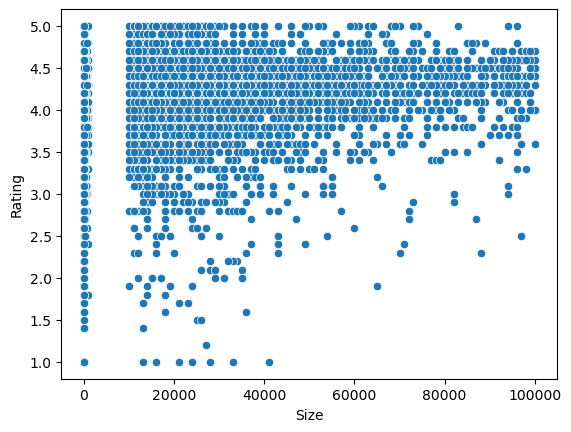

In [44]:
sns.scatterplot(x= df2["Size"], y= df2["Rating"], data=df2)

##### Insights-
- There is no realtionship between Size and Rating

In [45]:
df2.corr()

,Rating,Size
Rating,1.000000,0.082134
Size,0.082134,1.000000


##### There is nearly 0 correlation between Size and Rating

#### (13)-

In [46]:
df2["Type"].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

In [47]:
df2["Type"].isnull().sum()

1

In [48]:
df2[df2["Type"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,NaN,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [49]:
df2= df2.drop(9148).reset_index(drop=True)

In [50]:
# perform ordinal encoding on Type column-
from sklearn.preprocessing import OrdinalEncoder
ord_encoder= OrdinalEncoder(categories=[["Free", "Paid"]])
df2["Type"]= ord_encoder.fit_transform(df2[["Type"]])

In [51]:
df2.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",0.0,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",0.0,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",0.0,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [52]:
df2["Price"].isnull().sum()

0

In [53]:
df2["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [54]:
df2["Price"]= df2["Price"].str.replace("$", "")

In [55]:
df2.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",0.0,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",0.0,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [56]:
# typecast Price and Type column to float dtype-
df2["Price"]= df2["Price"].astype(float)
df2["Type"]= df2["Type"].astype(float)

<AxesSubplot: xlabel='Type', ylabel='Price'>

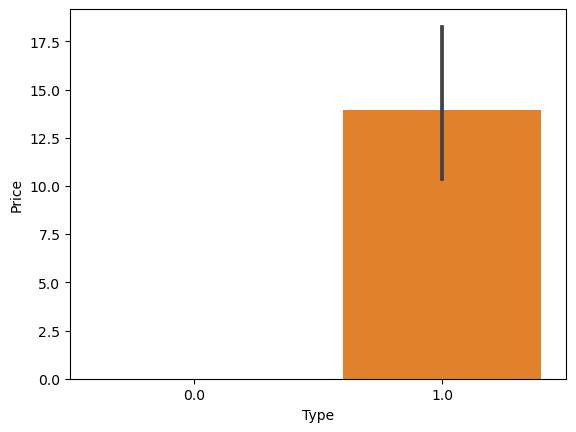

In [57]:
sns.barplot(x= df2["Type"], y=df2["Price"], data=df2)

##### Insights-
- Type 0.0 corresponds to Free type apps so its Price is 0.0
- Type 1.0 corresponds to Paid type apps, so their avg. Price is around 13.75 dollars.

#### (14)-

In [58]:
# we do feature engineering on App column-
df2["App"].isnull().sum()

0

In [59]:
df2["App"].duplicated().sum()

1181

In [60]:
# we have to drop these duplicates-
df2.drop_duplicates(subset=["App"], keep="first",inplace=True)

In [61]:
df2["App"].duplicated().sum()

0

In [62]:
# we do feature engineering on Installs column-
df2["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [63]:
chars_to_remove= ["+", ","]
for i in chars_to_remove:
    df2["Installs"]= df2["Installs"].str.replace(i, "")

In [64]:
df2.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,0.0,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,0.0,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [65]:
# typecast Installs column to int dtype-
df2["Installs"]= df2["Installs"].astype(int)

In [67]:
df2.sort_values(by=["Installs", "Rating"], ascending=False)[["App", "Installs", "Rating"]][0:10]

,App,Installs,Rating
1654,Subway Surfers,1000000000,4.5
2545,Instagram,1000000000,4.5
2808,Google Photos,1000000000,4.5
336,WhatsApp Messenger,1000000000,4.4
3234,Google,1000000000,4.4
3454,Google Drive,1000000000,4.4
338,Google Chrome: Fast & Secure,1000000000,4.3
340,Gmail,1000000000,4.3
865,Google Play Games,1000000000,4.3
3117,Maps - Navigate & Explore,1000000000,4.3


##### These are the top 10 Apps with the highest number of Installs

#### (15)-
##### Inorder to find most popular app categories, we plot a pie chart to see the distribution of Categories.
##### We can also analyze the features like Installs and Rating to identify the most popular app Categories

In [68]:
df2["Category"].value_counts()

FAMILY                 1831
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

<AxesSubplot: ylabel='Category'>

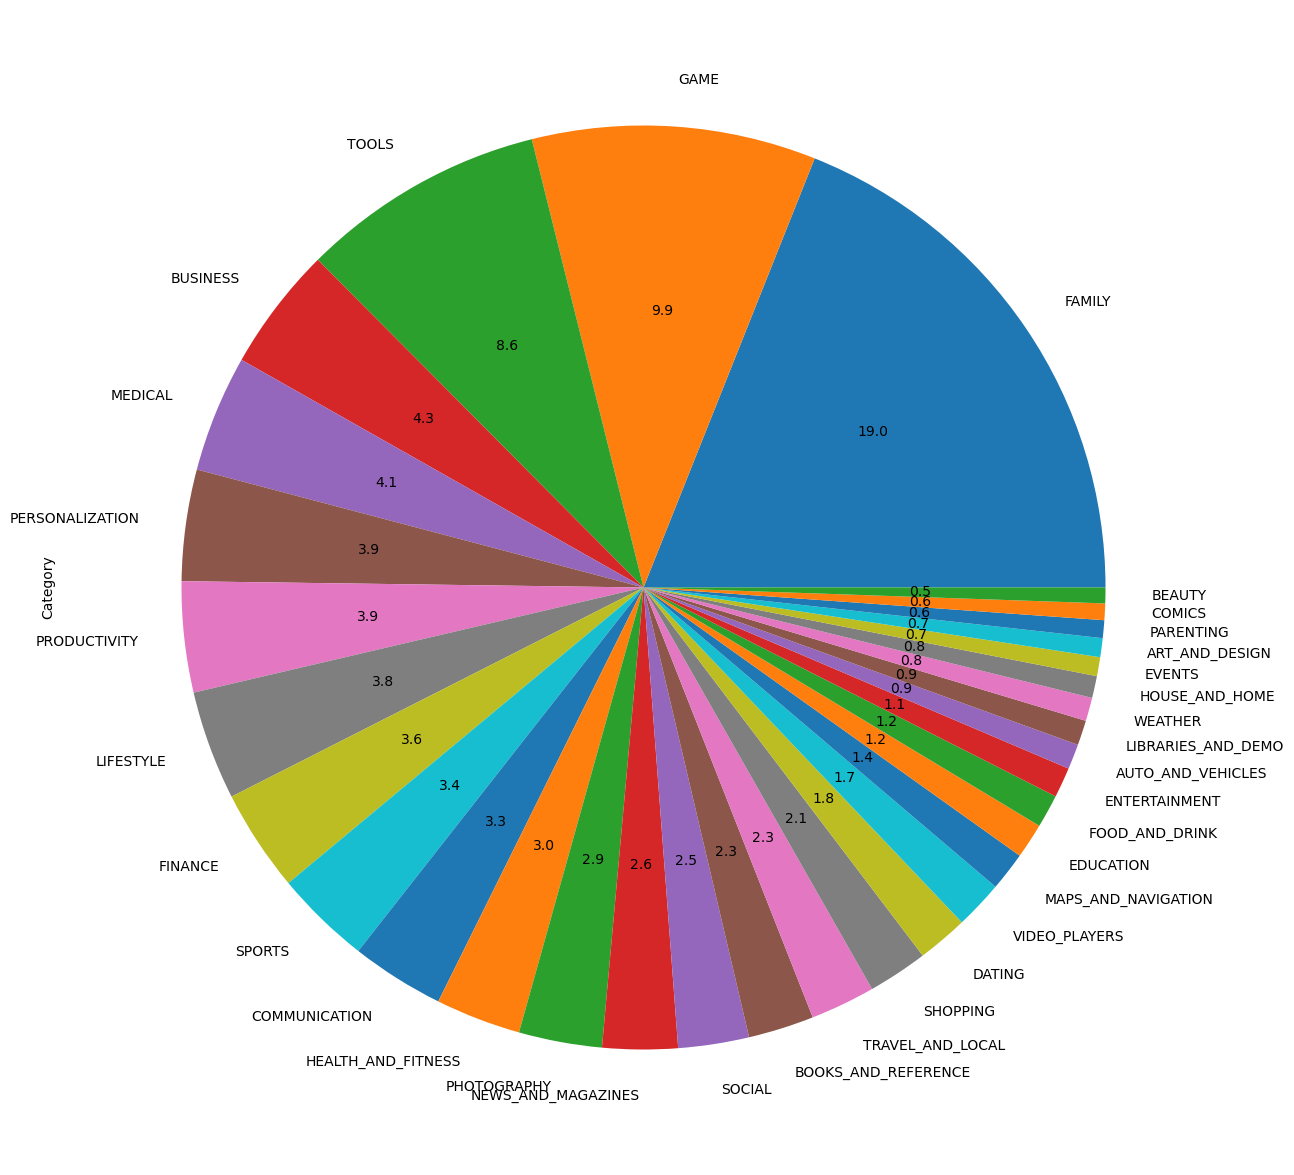

In [69]:
df2["Category"].value_counts().plot.pie(y=df2["Category"], figsize=(15,15),autopct="%1.1f")

##### Insights-
- We observe that FAMILY is the Category with highest data count i.e. 19% 
- GAME, TOOLS are other Categories having high percentage of data i.e. 9.9% and 8.6% respectively.

In [70]:
df3= df2.groupby("Category")["Installs"].sum().sort_values(ascending=False).reset_index()
df3[0:10]

,Category,Installs
0,GAME,13878924415
1,COMMUNICATION,11038276251
2,TOOLS,8001771915
3,PRODUCTIVITY,5793091369
4,SOCIAL,5487867902
5,PHOTOGRAPHY,4649147655
6,FAMILY,4427941505
7,VIDEO_PLAYERS,3926902720
8,TRAVEL_AND_LOCAL,2894887146
9,NEWS_AND_MAGAZINES,2369217760


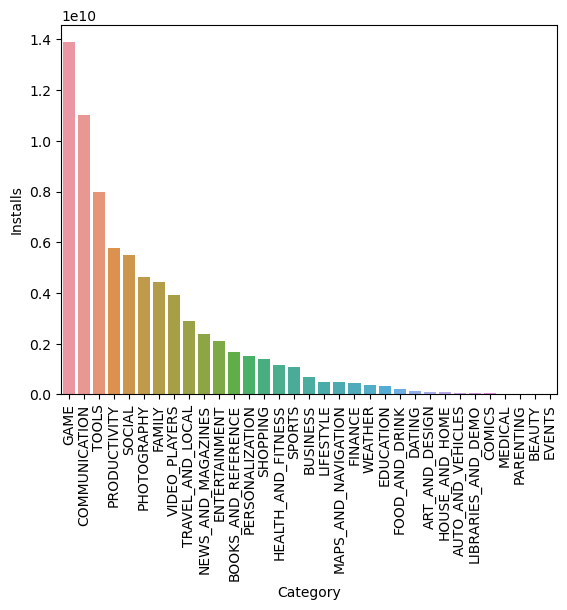

In [71]:
sns.barplot(x= df3["Category"], y=df3["Installs"], data=df3)
plt.xticks(rotation=90)
plt.show()

##### Insights-
- GAME Category has the highest no. of Installs
- It is followed by COMMUNICATION, TOOLS, PRODUCTIVITY, SOCIAL etc.

In [72]:
df4= df2.groupby("Category")["Rating"].mean().sort_values(ascending=False).reset_index()
df4[0:10]

,Category,Rating
0,EVENTS,4.435556
1,EDUCATION,4.364407
2,ART_AND_DESIGN,4.357377
3,BOOKS_AND_REFERENCE,4.344970
4,PERSONALIZATION,4.332215
5,PARENTING,4.300000
6,BEAUTY,4.278571
7,GAME,4.247368
8,SOCIAL,4.247291
9,WEATHER,4.243056


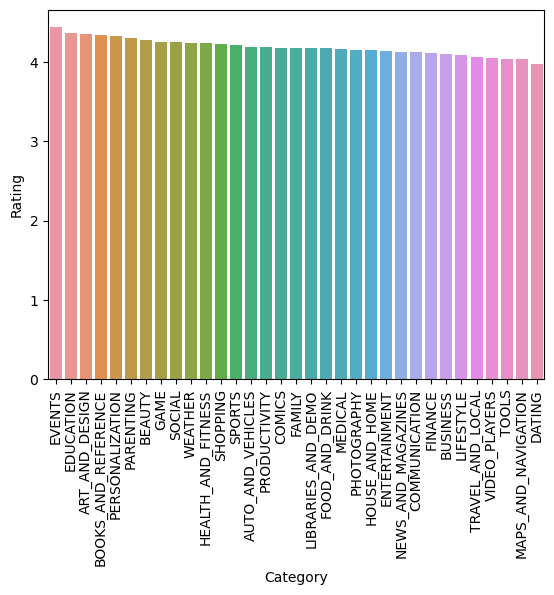

In [73]:
sns.barplot(x=df4["Category"], y=df4["Rating"], data=df4)
plt.xticks(rotation=90)
plt.show()

##### Insights-
- On the basis of average Rating, EVENTS Category has the highest mean rating.
- The average ratings of the apps in different Categories lies between 4-4.5

#### (16)-

1. To find out the most successful app developers, we can analyze the features like Genres, Installs, Rating, Price, App, Category.
2. We can find out the popular Categories or Apps or Genres based on Ratings, Installs etc. Then we can comment on the suucessfull app developers.
3. Visulization tools like barplots, scatter plot, pie chart etc. can help us to visualize and present the findings.

In [77]:
df2.sort_values(by=["Installs", "Rating"], ascending=False)[["App", "Installs", "Rating"]][0:10]

,App,Installs,Rating
1654,Subway Surfers,1000000000,4.5
2545,Instagram,1000000000,4.5
2808,Google Photos,1000000000,4.5
336,WhatsApp Messenger,1000000000,4.4
3234,Google,1000000000,4.4
3454,Google Drive,1000000000,4.4
338,Google Chrome: Fast & Secure,1000000000,4.3
340,Gmail,1000000000,4.3
865,Google Play Games,1000000000,4.3
3117,Maps - Navigate & Explore,1000000000,4.3


In [78]:
df2.groupby(["App"])["Installs"].sum().sort_values(ascending=False).reset_index()[:10]

,App,Installs
0,WhatsApp Messenger,1000000000
1,Google Photos,1000000000
2,Google Street View,1000000000
3,Google Chrome: Fast & Secure,1000000000
4,Google+,1000000000
5,Google Play Games,1000000000
6,Google Play Books,1000000000
7,YouTube,1000000000
8,Google News,1000000000
9,Google,1000000000


In [79]:
df2.groupby(["Genres"])["Installs"].sum().sort_values(ascending=False).reset_index()[:10]

,Genres,Installs
0,Communication,11038276251
1,Tools,7991771915
2,Productivity,5793091369
3,Social,5487867902
4,Photography,4649147655
5,Video Players & Editors,3916902720
6,Arcade,3755129155
7,Action,3483039190
8,Casual,3052830740
9,Entertainment,3014714684


In [94]:
df5= df2.groupby(["Genres"])["Rating"].mean().sort_values(ascending=False).reset_index()[:10]
df5

,Genres,Rating
0,Comics;Creativity,4.800000
1,Board;Pretend Play,4.800000
2,Health & Fitness;Education,4.700000
3,Adventure;Brain Games,4.600000
4,Puzzle;Education,4.600000
5,Strategy;Action & Adventure,4.600000
6,Entertainment;Creativity,4.533333
7,Music;Music & Video,4.533333
8,Racing;Pretend Play,4.500000
9,Tools;Education,4.500000


In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x=df5["Genres"], y=df5["Rating"], data=df6)
plt.title("Genres vs. Avg. Rating")
plt.xticks(rotation=90)
plt.show()

In [99]:
# I have not attached the plot because of the "file size too large and uanble to save error".

In [92]:
df2.groupby("Type")["Installs"].sum().sort_values(ascending=False).reset_index()

,Type,Installs
0,0.0,75065572646
1,1.0,57364881


<AxesSubplot: xlabel='Type', ylabel='Installs'>

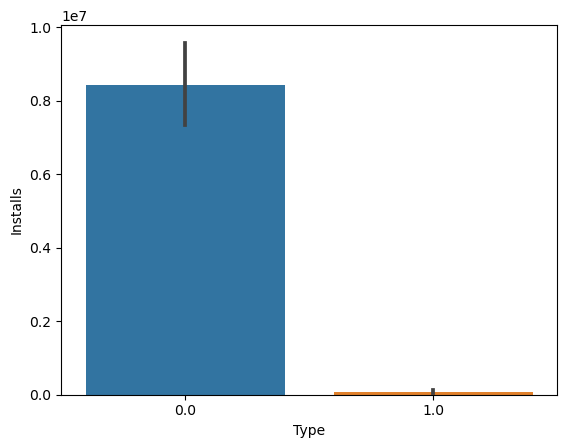

In [86]:
sns.barplot(x=df2["Type"], y=df2["Installs"], data=df2)

##### Insights-
1. On the basis of highest no. of Installs and Rating, the most popular Apps are Subway Surfers, Instagram, Google photos, Whatsapp Messenger, Google etc.
2. Communication, Tolls, Productivity, Social, Photography etc. are some of the genres with highest no. of Installs
3. Comics, Creativity is the genre with highest mean rating of 4.8
4. Type 0.0 i.e Free apps are more installed as compared to paid ones.

##### These type of app developers are the most successful.